In [1]:
import torch

# 1. tensor的基本操作  
## 1.1 创建tensor

In [2]:
tensor_ept = torch.empty(5, 3)  # 创建一个未初始化的tensor

In [3]:
tensor_ept

tensor([[9.5461e-01, 4.4377e+27, 1.7975e+19],
        [4.6894e+27, 7.9463e+08, 3.2604e-12],
        [2.6209e+20, 4.1641e+12, 1.9434e-19],
        [3.0881e+29, 6.3828e+28, 1.4603e-19],
        [7.7179e+28, 7.7591e+26, 3.0357e+32]])

In [4]:
tensor_rdm = torch.rand(5, 3)  # 创建一个随机初始化的tensor

In [5]:
tensor_rdm

tensor([[0.0707, 0.3122, 0.3242],
        [0.1317, 0.2096, 0.8370],
        [0.0986, 0.4405, 0.5044],
        [0.6181, 0.1908, 0.0500],
        [0.0427, 0.7300, 0.0691]])

In [6]:
tensor_zero = torch.zeros(5, 3)  # 创建一个全0的tensor

In [7]:
tensor_zero

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [8]:
tensor_from_float = torch.tensor([5.5, 3])   # 直接根据list创建tensor

In [9]:
tensor_from_float

tensor([5.5000, 3.0000])

In [10]:
tensor_new = torch.randn_like(tensor_zero, dtype=torch.float) # 创建与现有tensor size相同的新tensor, 可指定dtype

In [11]:
tensor_new

tensor([[ 2.7963, -1.4188, -0.4293],
        [-0.1998, -0.9627, -0.1940],
        [ 0.1747, -1.5284,  1.0938],
        [-0.0707, -0.3716, -0.4457],
        [ 1.5390,  0.9983,  0.4770]])

还有很多函数可以创建tensor，可以翻翻官网api就知道了。一般在创建tensor的时候，都可以指定数据类型dtype和存放device(cpu/gpu)

## 1.2 tensor的基本操作

### 1.2.1 tensor size   
tensor.size()和tensor.shape，都能获取tensor.Size; 它们的返回值可视为一个tuple,支持所有tuple的操作

In [12]:
tensor_rdm.size()

torch.Size([5, 3])

In [13]:
tensor_rdm.shape

torch.Size([5, 3])

In [14]:
tensor_rdm.size()[0]

5

In [15]:
tensor_rdm.size()[1]

3

In [70]:
len(tensor_rdm)  # len()， 可用来获取tensor中样本数量

5

### 1.2.2 算术运算

#### 1.2.2.1 加法运算  
tensor加法有3种形式:  
1. 直接相加  
2. 用torch.add(), 用torch.add()还能指定将结果输出到某个tensor  
3. inplace加法， Pytorch操作inplace版本都有后缀"_"， 如x.add_(y)

In [16]:
x = torch.ones(5,3)
y = torch.randn(5,3, dtype=torch.float)

In [17]:
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [18]:
y

tensor([[ 0.6646,  2.0334,  0.4872],
        [-0.4476,  0.4482,  0.5402],
        [-0.3879,  0.9865, -0.1844],
        [-0.0182, -0.0726, -2.7224],
        [ 0.5300, -1.6597,  0.5297]])

In [19]:
x + y

tensor([[ 1.6646,  3.0334,  1.4872],
        [ 0.5524,  1.4482,  1.5402],
        [ 0.6121,  1.9865,  0.8156],
        [ 0.9818,  0.9274, -1.7224],
        [ 1.5300, -0.6597,  1.5297]])

In [20]:
torch.add(x, y)

tensor([[ 1.6646,  3.0334,  1.4872],
        [ 0.5524,  1.4482,  1.5402],
        [ 0.6121,  1.9865,  0.8156],
        [ 0.9818,  0.9274, -1.7224],
        [ 1.5300, -0.6597,  1.5297]])

In [21]:
result = torch.empty(5,3)

In [22]:
torch.add(x, y, out=result)

tensor([[ 1.6646,  3.0334,  1.4872],
        [ 0.5524,  1.4482,  1.5402],
        [ 0.6121,  1.9865,  0.8156],
        [ 0.9818,  0.9274, -1.7224],
        [ 1.5300, -0.6597,  1.5297]])

In [23]:
result

tensor([[ 1.6646,  3.0334,  1.4872],
        [ 0.5524,  1.4482,  1.5402],
        [ 0.6121,  1.9865,  0.8156],
        [ 0.9818,  0.9274, -1.7224],
        [ 1.5300, -0.6597,  1.5297]])

In [24]:
x.add_(y)

tensor([[ 1.6646,  3.0334,  1.4872],
        [ 0.5524,  1.4482,  1.5402],
        [ 0.6121,  1.9865,  0.8156],
        [ 0.9818,  0.9274, -1.7224],
        [ 1.5300, -0.6597,  1.5297]])

In [25]:
x

tensor([[ 1.6646,  3.0334,  1.4872],
        [ 0.5524,  1.4482,  1.5402],
        [ 0.6121,  1.9865,  0.8156],
        [ 0.9818,  0.9274, -1.7224],
        [ 1.5300, -0.6597,  1.5297]])

减法、乘法、除法参考官网api

### 1.2.3 索引  
操作tensor与操作np.array类似，与np.array不同的是，tensor索引出来的结果与原数据共享内存单元。

In [26]:
x

tensor([[ 1.6646,  3.0334,  1.4872],
        [ 0.5524,  1.4482,  1.5402],
        [ 0.6121,  1.9865,  0.8156],
        [ 0.9818,  0.9274, -1.7224],
        [ 1.5300, -0.6597,  1.5297]])

In [27]:
y = x[:1, :]

In [28]:
y

tensor([[1.6646, 3.0334, 1.4872]])

In [29]:
y += 1  # 修改y, x也会变

In [30]:
y

tensor([[2.6646, 4.0334, 2.4872]])

In [31]:
x

tensor([[ 2.6646,  4.0334,  2.4872],
        [ 0.5524,  1.4482,  1.5402],
        [ 0.6121,  1.9865,  0.8156],
        [ 0.9818,  0.9274, -1.7224],
        [ 1.5300, -0.6597,  1.5297]])

还有一些索引高级的索引函数，参考pytorch官网api

### 1.2.4 改变形状
用view来改变tensor形状, (python的id()函数：如果两个实例的id一致，那么它们所对应的内存地址相同；反之不同)

In [32]:
y = x.view(15)
print(y)
print(y.shape)
print(id(y))
print(id(x))

tensor([ 2.6646,  4.0334,  2.4872,  0.5524,  1.4482,  1.5402,  0.6121,  1.9865,
         0.8156,  0.9818,  0.9274, -1.7224,  1.5300, -0.6597,  1.5297])
torch.Size([15])
139791092951296
139791092915440


In [33]:
z = x.view(-1, 5)
print(z)
print(z.size())

tensor([[ 2.6646,  4.0334,  2.4872,  0.5524,  1.4482],
        [ 1.5402,  0.6121,  1.9865,  0.8156,  0.9818],
        [ 0.9274, -1.7224,  1.5300, -0.6597,  1.5297]])
torch.Size([3, 5])


**注意**：用view()来改变形状，返回的新tensor与源tensor虽然size不同，但共享data,也即其中一个改变，另一个也会跟着改变。（view只改变了对这个张量的观察角度，内部数据并未改变）,虽然新老tensor共享data，但它们是不同实例，id不一致(因为tensor除了包含data外还有一些其他属性)

In [34]:
x += 1
print(x)
print(y)

tensor([[ 3.6646,  5.0334,  3.4872],
        [ 1.5524,  2.4482,  2.5402],
        [ 1.6121,  2.9865,  1.8156],
        [ 1.9818,  1.9274, -0.7224],
        [ 2.5300,  0.3403,  2.5297]])
tensor([ 3.6646,  5.0334,  3.4872,  1.5524,  2.4482,  2.5402,  1.6121,  2.9865,
         1.8156,  1.9818,  1.9274, -0.7224,  2.5300,  0.3403,  2.5297])


如果想返回一个真正新的副本(不共享data)，推荐先用clone()创造一个副本，然后再使用view

In [35]:
x_cp = x.clone().view(15)
x -= 1
print(x)
print(x_cp)

tensor([[ 2.6646,  4.0334,  2.4872],
        [ 0.5524,  1.4482,  1.5402],
        [ 0.6121,  1.9865,  0.8156],
        [ 0.9818,  0.9274, -1.7224],
        [ 1.5300, -0.6597,  1.5297]])
tensor([ 3.6646,  5.0334,  3.4872,  1.5524,  2.4482,  2.5402,  1.6121,  2.9865,
         1.8156,  1.9818,  1.9274, -0.7224,  2.5300,  0.3403,  2.5297])


**没看懂：** 使用clone还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源Tensor

In [36]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.8793])
-0.8792620897293091


### 1.2.5 线性代数

函数	功能  
trace	对角线元素之和(矩阵的迹)  
diag	对角线元素  
triu/tril	矩阵的上三角/下三角，可指定偏移量  
mm/bmm	矩阵乘法，batch的矩阵乘法  
addmm/addbmm/addmv/addr/baddbmm..	矩阵运算  
t	转置  
dot/cross	内积/外积  
inverse	求逆矩阵  
svd	奇异值分解  
  
更多tensor线性代数操作，[参考官网api](https://pytorch.org/docs/stable/tensors.html#)

### 1.2.6 广播机制  
当对2个形状不同的tensor做按元素运算时，可能会触发广播(broadcasting)机制: 先适当复制元素使这2个tensor形状相同后，再按元素运算

In [37]:
x = torch.arange(1,3).view(1,2)
print(x)
y = torch.arange(1,4).view(3,1)
print(y)
print(x+y) # 将x第一行复制2次，得到(3,2)的新tensor；将y的第1列复制1次，得到(3,2)的tensor;对两个新tensor按元素相加，得到结果

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


### 1.2.7 运算的内存开销  
前面说的索引操作不会开辟新的内存空间，而像y = x + y这样的运算是会新开内存的，然后将y指向新内存。

In [38]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
y = y + x
print(id(y) == id_before)

False


以下4中写法，是inplace的，不会开新内存：

In [39]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
y[:] = y + x
print(id(y) == id_before)

True


In [40]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
y += x
print(id(y) == id_before)

True


In [41]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
torch.add(x, y, out=y)
print(id(y) == id_before)

True


In [42]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
y.add_(x)
print(id(y) == id_before)

True


### 1.2.8 tensor和numpy相互转换
1. tensor转numpy数组:tensor.numpy()  
2. numpy数组转tensor:torch.from_numpy()  
这两个函数所产生的tensor和numpy中的数组共享相同的内存(所以转换速度快)，改变其中一个时，另一个也会改变  
将numpy数组转成torch.tensor还有一个方法：torch.tensor()，但该方法总是会进行数据拷贝，返回的tensor和原来的数据不再共享内存

#### 1.2.8.1 tensor转numpy数组

In [43]:
a = torch.ones(5)
b = a.numpy()
print(a, b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]


In [44]:
a += 1
print(a, b)
b += 1
print(a, b)

tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.]) [3. 3. 3. 3. 3.]


#### 1.2.8.2 numpy数组转tensor

In [45]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [46]:
a += 1
print(a, b)
b += 1
print(a, b)

[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


In [47]:
c = torch.tensor(a)
a += 1
print(a, c)

[4. 4. 4. 4. 4.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


### 1.2.9 Tensor种类

参考[官网api](https://pytorch.org/docs/stable/tensor_attributes.html?highlight=longtensor)  
比如：
torch.LongTensor()，也是一个Tensor, dtype=torch.long or torch.int64

## 1.3 tensor on GPU

### 1.3.1 使用colab学习pytorch

colab是谷歌提供的一个免费GPU服务，可以在colab上打开一个.ipynb，运行gpu代码，虽然显存有限，但足够用于学习深度学习。

**在colab中配置pytorch gpu学习环境：**  
1. 打开一个.ipynb，在代码输入框中输入并运行：  
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
2. 设置.ipynb支持GPU运算：  
修改->笔记本设置->硬件加速->GPU
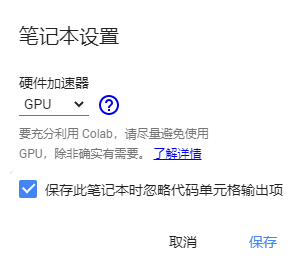

### 1.3.2 在GPU上运行pytorch

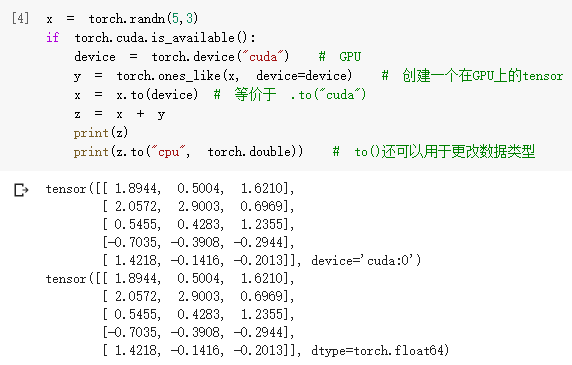

## 1.4 自动求梯度

pytorch提供的autograd包，能够根据输入和前向传播过程自动构建计算图，并执行反向传播。本节将演示如何使用autograd包来进行自动求梯度的操作。

### 1.4.1 概念

Tensor是pytorch的核心，如果将Tensor的requires_grad设置为True, 它将开始追踪有该Tensor参与(直接或间接参与)的所有运算操作(并利用链式法则进行梯度传播)。完成计算后，可以用计算图的root节点变量(我自己取的名称，会意)调用.backward()来完成所有梯度计算。该Tensor的梯度将累积到.grad属性中。

**注意：** 在y.backward()时，如果y是标量，则不需要为backward()传入任何参数；否则，需要传入一个与y同形的Tensor,解释见下面1.4.4.

### 1.4.2 Tensor

In [48]:
x = torch.ones(2,2, requires_grad=True)
print(x)
print(x.grad_fn)  # 计算图的初始节点的grad_fn始终为None

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None


In [49]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [50]:
print(x.is_leaf, y.is_leaf)   ## 是否为计算图的初始节点

True False


In [51]:
z = y * y * 3  # 逐元素相乘， x间接参与计算z, 反向传播求导时，将会计算z对x的导数
out = z.mean()
print(y, z, out)
print(y.requires_grad, z.requires_grad, out.requires_grad)  # y中的x需要求导，所以求导链式法则，也需要对y求导，同样需要对z求导，如果out不是计算图的最终节点，也同样需要对out求导，此处out是计算图的最终节点，不需要对out求导

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>) tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
True True True


通过requires_grad_()来用in-place的方式改变requires_grad属性：

In [52]:
a = torch.randn(2, 2)   # 默认requires_grad = False
a = ((a * 3) / (a - 1))
print(a.requires_grad)  # False
a.requires_grad_(True)
print(a.requires_grad)  # True
b = (a * a).sum()
print(b.grad_fn)

False
True


### 1.4.3 梯度

In [53]:
out.backward()  #out是标量，调用backward时不需要指定求导变量

In [54]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [55]:
z.grad  # y和z不是计算图的leaf Tensor，求导失败

/root/anaconda3/envs/explore/lib/python3.6/site-packages/torch/tensor.py:746: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  warnings.warn("The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad "


与手工计算出的out对x的求导结果一致：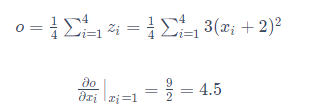

grad在反向传播过程中是累加的，这意味着每一次反向传播，梯度都会累加之前的梯度，所以一般在反向传播之前需把梯度清零。

In [59]:
out2 = x.sum()
out2.backward()
print(x.grad)  # 梯度累加了,4.5+1=5.5

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000]])


In [60]:
out3 = x.sum()
x.grad.data.zero_()  ## 梯度清零
out3.backward()
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])


### 1.4.4 非标量调用.backward()

1.4.1节中说，如果y不是标量，那么在y调用backward()时需要传入一个与y同形的Tensor。这是因为张量对张量求导可能会比较复杂，**pytorch不允许张量对张量求导，只允许标量对张量求导，求导结果是与自变量同形的张量。** 所以pytorch把通过将所有张量的元素加权求和的方式转换为标量，举个例子，假设$y$是由$x$计算而来的，$w$和$y$是同形的张量，则 $y$.backward($w$)的含义是，先计算：$l$=torch.sum($y$*$w$)，得到标量$l$，然后求$l$对自变量$x$的导数。

In [61]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = 2 * x
z = y.view(2,2)
print(z)

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward>)


In [62]:
v = torch.tensor([[1.0, 0.1],[0.01, 0.001]], dtype=torch.float)
z.backward(v)
print(x.grad)

tensor([2.0000, 0.2000, 0.0200, 0.0020])


用torch.no_grad中断梯度追踪的例子：

In [63]:
x = torch.tensor(1.0, requires_grad=True)
y1 = x ** 2
with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2

print(x.requires_grad)
print(y1, y1.requires_grad)
print(y2, y2.requires_grad)
print(y3, y3.requires_grad)

True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True


In [64]:
y3.backward()
print(x.grad)

tensor(2.)


In [65]:
y2.backward()  # 正向传播计算y2时，不需要追踪梯度，所以y2.requires_grad=False, 此语句不能正确执行

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

**如果想要修改tensor的数值，但是又不希望被autograd记录(即不影响反向传播),那么我们可以对tensor.data进行操作：**

In [66]:
x = torch.ones(1, requires_grad=True)
print(x.data)  # x.data也是一个tensor
print(x.data.requires_grad)  # 但是独立于计算图之外

tensor([1.])
False


In [67]:
y = 2 * x
x.data *= 100  # 只改变了值，不会记录在计算图，所以不影响梯度传播

y.backward()
print(x)
print(x.grad)

tensor([100.], requires_grad=True)
tensor([2.])


### 1.4.5 数学

#### 1.4.5.1 标量对向量求导、向量对向量求导
由矩阵求导理论可知：对于一个函数值和自变量都为向量的函数，$\vec{y} = f(\vec{x})$， $\vec{y}$关于$\vec{x}$的梯度就是一个雅可比矩阵: 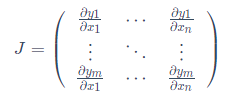

如果$\vec{v}$是一个标量函数$l=y(\vec{y})$的梯度：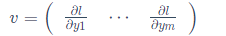

那么根据链式法则，我们有$l$关于$\vec{x}$的雅可比矩阵就为：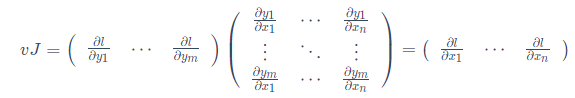

#### 1.4.5.2 矩阵对矩阵求导得到的导数维度

假设行传为m * n的矩阵X经过运算得到p * q的矩阵Y， Y又经过运算得到s * t的矩阵Z。那么：dZ/dY是一个s * t * p * q的四维张量, dY/dX是一个p * q * m * n的四维张量